<a href="https://colab.research.google.com/github/iamgus123/dl19/blob/main/project/dl19_prj03_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#
# [Prj-3] test 데이터를 validation으로 설정해서 모델을 다시 훈련시키시오.
# import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(train_images.shape, train_labels.shape)
# 픽셀 값을 0~1 사이로 정규화한다. 
train_images, test_images = train_images / 255.0, test_images / 255.0
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model2.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000,)
Epoch 1/20
1875/1875 [==============================] - 20s 5ms/step - loss: 0.1428 - accuracy: 0.9549 - val_loss: 0.0505 - val_accuracy: 0.9827
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0461 - accuracy: 0.9854 - val_loss: 0.0440 - val_accuracy: 0.9861
Epoch 3/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0333 - accuracy: 0.9896 - val_loss: 0.0333 - val_accuracy: 0.9904
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0272 - val_accuracy: 0.9919
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0335 - val_accuracy: 0.9903
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0253 - val_accuracy: 0.9931
Epoch 7/20
1875/1875 [===================

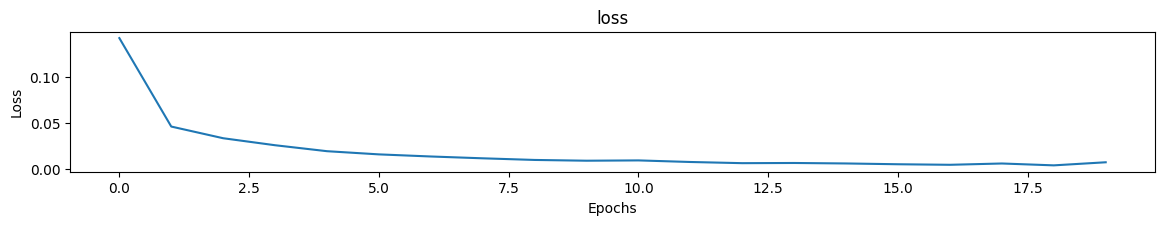

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


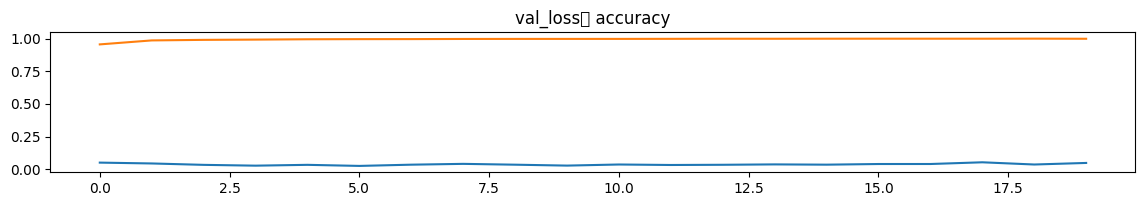

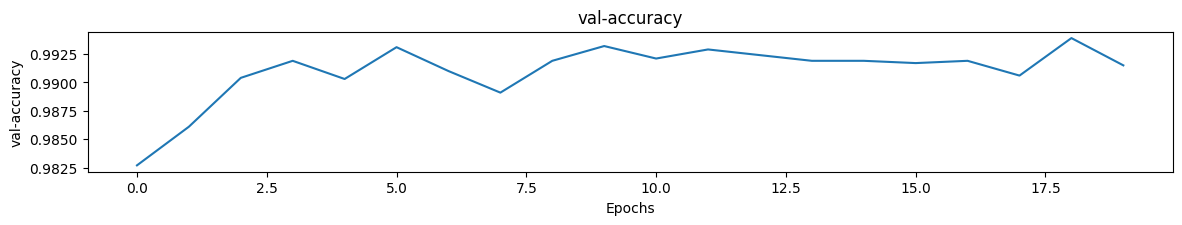

In [2]:

# 그리고 training history를 이용해서 loss, val_loss와 accuracy, val-accuracy 그래프 그리기

plt.figure(figsize=(14, 4))

plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(14, 4))
plt.subplot(2,1,2)
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.title('val_loss와 accuracy')
plt.show()

plt.figure(figsize=(14, 4))
plt.subplot(2,1,1)
plt.plot(history.history['val_accuracy'])
plt.title('val-accuracy')
plt.xlabel('Epochs')
plt.ylabel('val-accuracy')
plt.show()

# file name: dlxx_prj03_CNN_MNIST.ipynb
# 깃허브의 project 폴더에 저장하시오.
#